In [1]:
import pandas as pd

In [2]:
emicron = pd.read_csv('/Users/henriquerodrigues/Desktop/LSE/PP422/Project/Data/emicron_clean.csv')

#### __Variables to Investigate:__

1. Formalidad de entrada:

P1633: ¿El negocio o actividad tiene Registro Único Tributario (RUT)?

P1055: ¿El negocio o actividad  se encuentra registrado en alguna Cámara de Comercio?

1. Formalidad de insumo:

P3088: ¿Pagó su salud y/o pensión el mes anterior? 

P3090: ¿Pagó su ARL?

P3080: ¿Le pagó salud y/o pensión el mes pasado ?

P3084: ¿Le pagó ARL ?

P3032_3: Trabajadores(as) o familiares sin remuneración?

1. Formalidad tributaria:

P2991: En el último año, ¿realizó las(s) declaracion(es) de impuesto sobre la renta?

P2992: En el último año, ¿realizó las(s) declaracion(es) de IVA (Impuesto al Valor Agregado)?

P2993: En el último año, ¿realizó las(s) declaracion(es) de ICA (Impuesto de Industria y Comercio)?

P640: ¿Cuál es el principal registro que utiliza para llevar sus cuentas?

#### Useful

P986: ¿A que regimen pertenece? -> Necessary to determine if they have to pay taxes and have formal accounting

P3091: ¿Cuántas personas en promedio trabajaron en su negocio o actividad económica en el año anterior o en los meses de operación? -> Includes the owner, necessary to understand if healthcare/pensions should have been paid

P3079: ¿Cuánto le pagó el mes pasado? -> Unpaid employees don't have health and pensions contributions + Informal

P3031: En su actividad o negocio, ¿tiene personas que le ayudan?

P3032_1: Trabajadores(as) que reciben un pago?

P3032_1: Socios(as)?

P3032_1: Trabajadores(as) o familiares sin remuneración?

In [210]:
inv = emicron[["DIRECTORIO", "P1633", "P1055", "P3088", "P3090", "P3080", "P3084", "P2991", "P2992", "P2993", "P640", "P986", "P3091", "P3079", "P3032_1", "P3032_2", "P3032_3", 'P3031']]

In [211]:
inv

,DIRECTORIO,P1633,P1055,P3088,P3090,P3080,P3084,P2991,P2992,P2993,P640,P986,P3091,P3079,P3032_1,P3032_2,P3032_3,P3031
0,2120013,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2
1,2120018,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2
2,2120022,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2
3,2120023,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2
4,2120024,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85857,7277027,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2
85858,7277028,1,1,1,1,1.0,1.0,9.0,3.0,1.0,3,2.0,3,1000000.0,2.0,0.0,0.0,1
85859,7277029,1,2,1,2,NaN,NaN,9.0,3.0,3.0,3,2.0,1,NaN,NaN,NaN,NaN,2
85860,7277065,2,2,2,2,2.0,2.0,NaN,NaN,NaN,3,NaN,3,NaN,0.0,2.0,0.0,1


In [212]:
inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85862 entries, 0 to 85861
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIRECTORIO  85862 non-null  int64  
 1   P1633       85862 non-null  int64  
 2   P1055       85862 non-null  int64  
 3   P3088       85862 non-null  int64  
 4   P3090       85862 non-null  int64  
 5   P3080       11820 non-null  float64
 6   P3084       11820 non-null  float64
 7   P2991       19899 non-null  float64
 8   P2992       19899 non-null  float64
 9   P2993       19899 non-null  float64
 10  P640        85862 non-null  int64  
 11  P986        19899 non-null  float64
 12  P3091       85862 non-null  int64  
 13  P3079       5773 non-null   float64
 14  P3032_1     16122 non-null  float64
 15  P3032_2     16122 non-null  float64
 16  P3032_3     16122 non-null  float64
 17  P3031       85862 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 11.8 MB


In [213]:
inv.describe()

,DIRECTORIO,P1633,P1055,P3088,P3090,P3080,P3084,P2991,P2992,P2993,P640,P986,P3091,P3079,P3032_1,P3032_2,P3032_3,P3031
count,8.586200e+04,85862.000000,85862.000000,85862.000000,85862.000000,11820.000000,11820.000000,19899.000000,19899.000000,19899.000000,85862.000000,19899.000000,85862.000000,5.773000e+03,16122.000000,16122.000000,16122.000000,85862.000000
mean,6.362254e+06,1.768244,1.888845,1.958154,1.944900,1.906937,1.906430,2.670938,2.921303,2.672044,4.232676,1.939293,1.301880,8.131191e+05,0.950751,0.308771,0.414031,1.812234
std,1.503369e+06,0.421956,0.314326,0.334424,0.228177,0.320709,0.291242,1.413206,0.654540,1.568289,1.104890,0.238797,0.888092,5.595820e+05,1.262145,0.560077,0.633188,0.390528
min,2.120013e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,5.062826e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,4.800000e+05,0.000000,0.000000,0.000000,2.000000
50%,7.093747e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,2.000000,1.000000,8.500000e+05,1.000000,0.000000,0.000000,2.000000
75%,7.185496e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,2.000000,1.000000,1.000000e+06,1.000000,1.000000,1.000000,2.000000
max,7.277068e+06,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,9.000000,9.000000,9.000000,5.000000,2.000000,99.000000,1.500000e+07,8.000000,8.000000,6.000000,2.000000


In [16]:
# Does the business have RUT? (Yes, No)
inv.P1633.value_counts()

P1633
2    65963
1    19899
Name: count, dtype: int64

In [17]:
# Is the business registered in a Cámara de Comercio
# Less firms have completed this step
inv.P1055.value_counts()

P1055
2    76318
1     9544
Name: count, dtype: int64

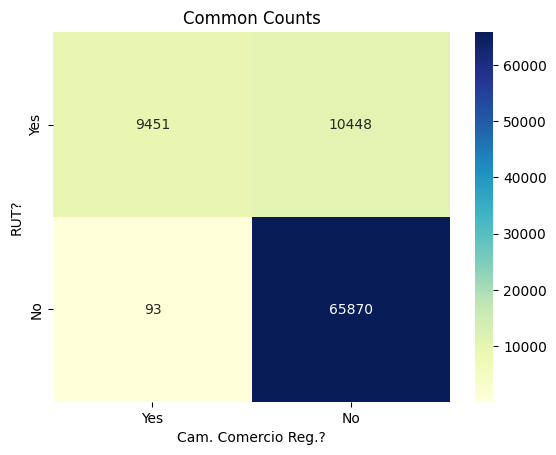

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(inv['P1633'], inv['P1055'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel('RUT?')
plt.xlabel('Cam. Comercio Reg.?')
ax.set_xticklabels(['Yes', 'No'])
ax.set_yticklabels(['Yes', 'No'])
plt.show()

The process seems to go RUT (easier, more people joining in total) -> Cam Comércio. But most businesses (76%) have none.

  1st Level - Having RUT or Cam. Com.


  2nd Level - Having RUT AND Cam Com.

In [18]:
# Owner's Health and Pensions? (Yes, No, Just H, Just P)
inv.P3088.value_counts()

P3088
2    76454
1     6558
3     2735
4      115
Name: count, dtype: int64

In [20]:
# Owner's ARL? (Yes, No)
inv.P3090.value_counts()

P3090
2    81131
1     4731
Name: count, dtype: int64

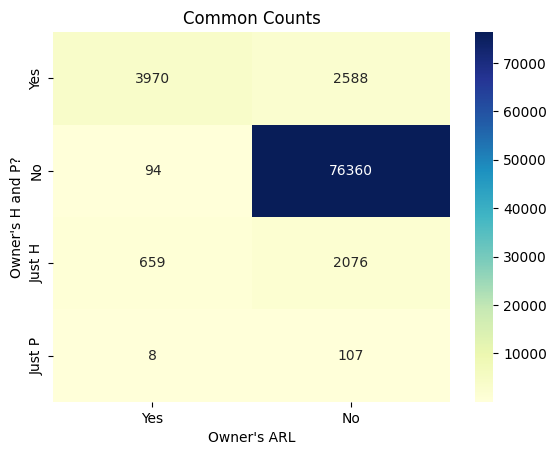

In [56]:
cross_tab = pd.crosstab(inv['P3088'], inv['P3090'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's H and P?")
plt.xlabel("Owner's ARL")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No'])
plt.show()

90% of firms don't pay the owner's health, pension and ARl contributions. Less than 5% pay everything. 84% of those that pay ARL also pay health and pensions. Firms that pay just pensions are the rarest.

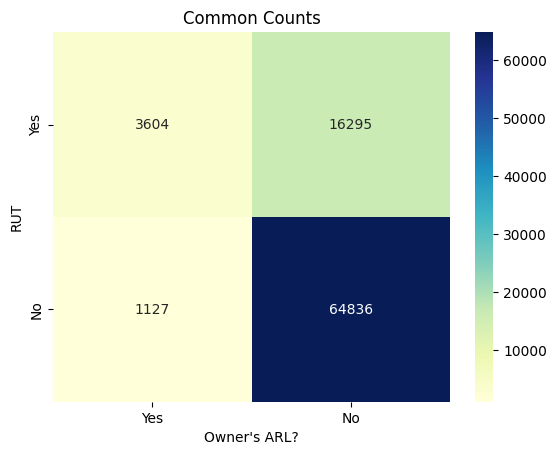

In [57]:
cross_tab = pd.crosstab(inv['P1633'], inv['P3090'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Owner's ARL?")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Yes', 'No'])
plt.show()

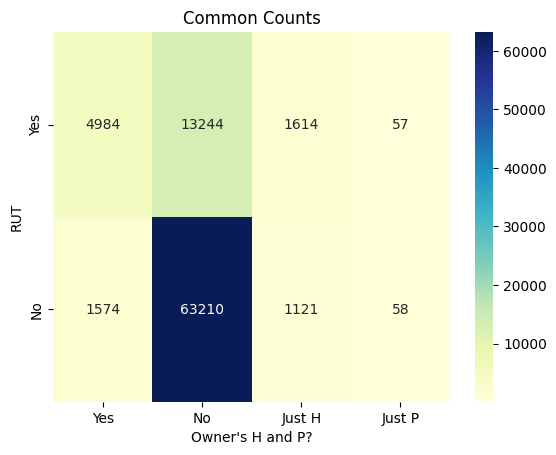

In [58]:
cross_tab = pd.crosstab(inv['P1633'], inv['P3088'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Owner's H and P?")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Yes', 'No', 'Just H', 'Just P'])
plt.show()

There are many unregistered firms that pay ARL and H+P!!! But most of those that have RUT still don't pay. It seems to be that paying RUT is a more common first step.

In [27]:
# number of workers (including owner) on average
inv.P3091.value_counts()

P3091
1     70688
2      9330
3      3350
4      1345
5       565
6       282
7       154
8        74
9        44
10       15
12        6
11        5
15        3
99        1
Name: count, dtype: int64

82% of firms have the owner as their only worker.

In [34]:
# number of firms with workers in the last year
len(inv[inv["P3091"]>1])

15174

In [216]:
# tiene personas que le ayudan? Sí = 1
len(inv[inv["P3031"]==1])

16122

In [205]:
inv['dummy'] = (inv['P3091'] > 1).astype(int)

# there are some discrepancies between the 2 variables
cross_tab = pd.crosstab(inv['dummy'], inv['P3031'])
print(cross_tab)

P3031      1      2
dummy              
0       1639  69049
1      14483    691


/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_73402/4013378648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv['dummy'] = (inv['P3091'] > 1).astype(int)


In [221]:
# how many firms pay their workers
(emicron['P3032_1']>=1).sum()

8701

In [227]:
# how many firms have unpaid workers
(inv['P3032_3']>=1).sum()

5656

In [226]:
# how many firms have paid or unpaid workers
len(inv[(inv['P3032_3']>=1) | (inv['P3032_1']>=1)])

13143

In [230]:
# why do we only have 11820 non-null values?
non_nan = inv[~inv['P3080'].isna()]
len(non_nan)

11820

In [21]:
# Employee's Healthcare and Pensions? (Yes, No, Just H, Just P)
# Only 11820 answers
inv.P3080.value_counts()

P3080
2.0    10520
1.0     1203
3.0       91
4.0        6
Name: count, dtype: int64

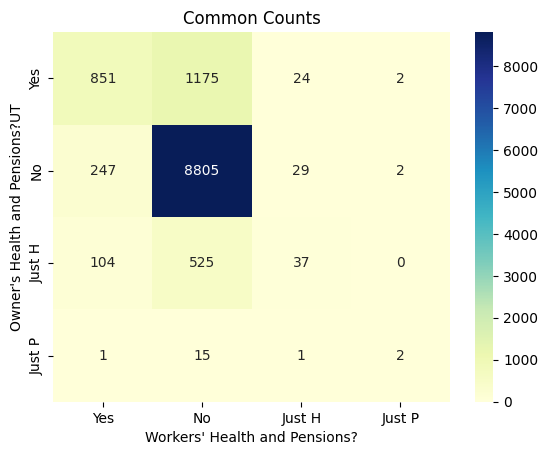

In [110]:
cross_tab = pd.crosstab(inv['P3088'], inv['P3080'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's Health and Pensions?UT")
plt.xlabel("Workers' Health and Pensions?")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No', 'Just H', 'Just P'])
plt.show()

In [22]:
# Employee's ARL?
# Only 11820 answers
inv.P3084.value_counts()

P3084
2.0    10714
1.0     1106
Name: count, dtype: int64

In [23]:
# Tax on profits? (Yes, No, Isn't Eligible, Missing)
# Only 19899 answers - number of businesses with RUT
inv.P2991.value_counts()

P2991
3.0    12264
1.0     3603
2.0     3362
9.0      670
Name: count, dtype: int64

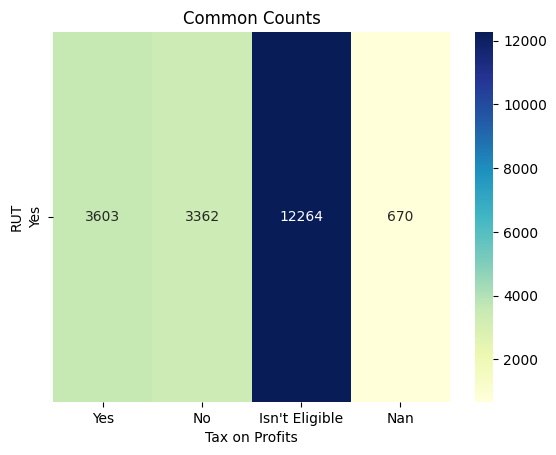

In [60]:
cross_tab = pd.crosstab(inv['P1633'], inv['P2991'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Tax on Profits")
ax.set_yticklabels(['Yes'])
ax.set_xticklabels(['Yes', 'No', 'Isn\'t Eligible', 'Nan'])
plt.show()

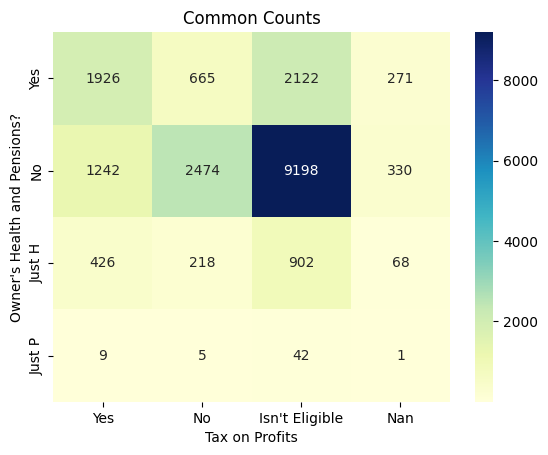

In [61]:
cross_tab = pd.crosstab(inv['P3088'], inv['P2991'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's Health and Pensions?")
plt.xlabel("Tax on Profits")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No', 'Isn\'t Eligible', 'Nan'])
plt.show()

In [24]:
# IVA? (Yes, No, Isn't Eligible, Missing)
# Only 19899 answers - number of businesses with RUT
#  el régimen simplificado no es responsable de IVA
inv.P2992.value_counts()

P2992
3.0    18458
1.0      979
2.0      340
9.0      122
Name: count, dtype: int64

In [96]:
# ICA? (Yes, No, Isn't Eligible, Missing)
# Only 19899 answers - number of businesses with RUT
inv.P2993.value_counts()

P2993
3.0    11654
1.0     4280
2.0     3108
9.0      857
Name: count, dtype: int64

Companies in each category are the same for IVA and ICA but not for tax on profits. There are more firms eligible for tax on profits. Why?

In [26]:
# Type of accounting? (Balance, Libro, Otro, Informes, No lleva)
inv.P640.value_counts()

P640
5    56223
3    24212
2     3534
1     1655
4      238
Name: count, dtype: int64

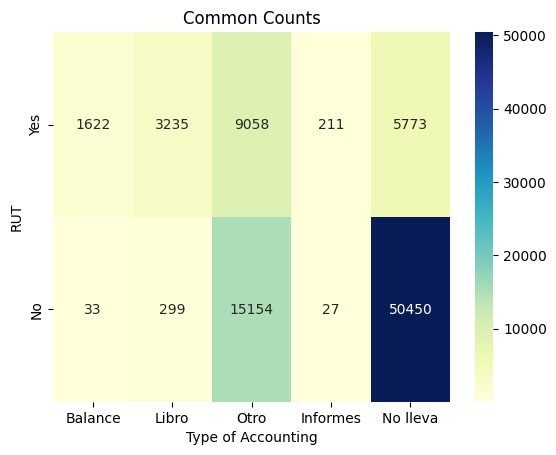

In [62]:
cross_tab = pd.crosstab(inv['P1633'], inv['P640'])

# Create a heatmap
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Type of Accounting")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Balance', 'Libro', 'Otro', 'Informes', 'No lleva'])
plt.show()

Most of those without RUT registration don't have accounting records. 


### __Building the Index:__
Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA. If eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

A fully informal firm will have an index of 0, while a fully formal one will have an index of 4.

In [138]:
for i in range(len(emicron)):
    # registered for both
    if emicron.at[i, 'P1633'] == 1 and emicron.at[i, 'P1055'] == 1:
        emicron.at[i, "II_D1"] = 1
    # not registered
    elif emicron.at[i, 'P1633'] == 2 and emicron.at[i, 'P1055'] == 2:
        emicron.at[i, "II_D1"] = 0
    #only registered in one
    else:
        emicron.at[i, "II_D1"] = 0.5

In [139]:
emicron.II_D1.value_counts()

II_D1
0.0    65870
0.5    10541
1.0     9451
Name: count, dtype: int64

In [163]:
for i in range(len(emicron)):
    # only onwer
    if emicron.at[i, 'P3091']==1:
        # pays H,P and ARL
        if (emicron.at[i, 'P3088']==1) & (emicron.at[i, 'P3090']==1):
            emicron.at[i, 'II_D2']=1
        # pays H,P or ARL:
        elif (emicron.at[i, 'P3088']==1) or (emicron.at[i, 'P3090']==1):
            emicron.at[i, 'II_D2']=0.5    
        # doesn't pay
        else:
            emicron.at[i, 'II_D2']=0

    # owner and employees
    else:
        cond1= 0
        cond2=0
        cond3=0
        cond4=0
        # pays H,P to owner
        if (emicron.at[i, 'P3088']==1):
            cond1 = 0.25
        # pays ARL to owner
        if (emicron.at[i, 'P3090']==1):
            cond2=0.25
        # pays H,P to workers
        if (emicron.at[i, 'P3080']==1):
            cond3=0.25
       # pays ARL to workers     
        if (emicron.at[i, 'P3084']==1):
            cond4=0.25
        emicron.at[i, 'II_D2']= cond1+cond2+cond3+cond4

In [164]:
emicron.II_D2.value_counts()

II_D2
0.00    78232
0.50     3510
1.00     2904
0.25      980
0.75      236
Name: count, dtype: int64

In [144]:
for i in range(len(emicron)):
    # pays tax on profits or not eligible
    if emicron.at[i, 'P2991'] in [1,3]:
        renta = 1/3
    # Nan, doesn't pay or doesn't want to say
    else:
        renta=0
    # iva
    if emicron.at[i, 'P2992'] in [1,3]:
        iva = 1/3
    else:
        iva=0
    # ica
    if emicron.at[i, 'P2993'] in [1,3]:
        ica = 1/3
    else:
        ica=0
    emicron.at[i, 'II_D3']=renta+iva+ica    
    

In [145]:
emicron.II_D3.value_counts()

II_D3
0.000000    66208
1.000000    14346
0.666667     2892
0.333333     2416
Name: count, dtype: int64

In [186]:
# categories taken from DANE's SISTEMA DE INFORMACIÓN PARA ACTIVIDADES ECONÓMICAS INFORMALES - SIECI report

for i in range(len(emicron)):
    # doesn't have accounting system
    if emicron.at[i, 'P640'] == 5:
        emicron.at[i, "II_D4"] = 0
    # informal accounting
    elif emicron.at[i, 'P640'] in [3]:
        emicron.at[i, "II_D4"] = 0.5
    #formal accounting
    elif emicron.at[i, 'P640'] in [1, 2, 4]:
        emicron.at[i, "II_D4"] = 1

In [187]:
emicron.II_D4.value_counts()

II_D4
0.0    56223
0.5    24212
1.0     5427
Name: count, dtype: int64

In [188]:
for i in range(len(emicron)):
    emicron.at[i, 'II'] = emicron.at[i, 'II_D1']+emicron.at[i, 'II_D2']+emicron.at[i, 'II_D3']+emicron.at[i, 'II_D4']

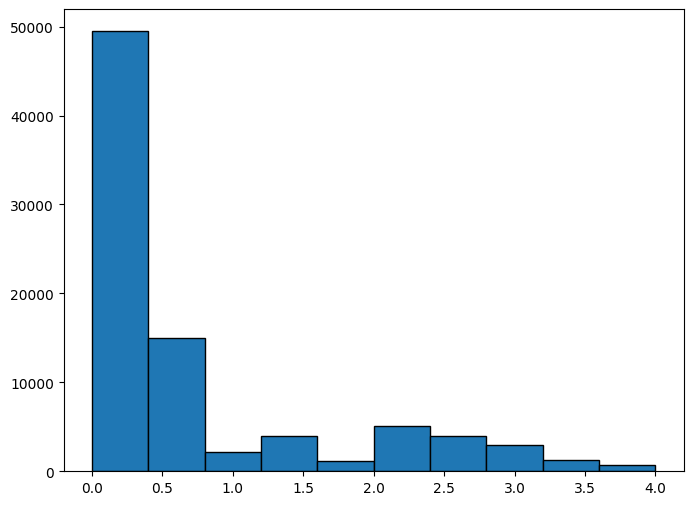

In [189]:
plt.figure(figsize=(8, 6))
plt.hist(emicron.II, edgecolor='black')
plt.show()

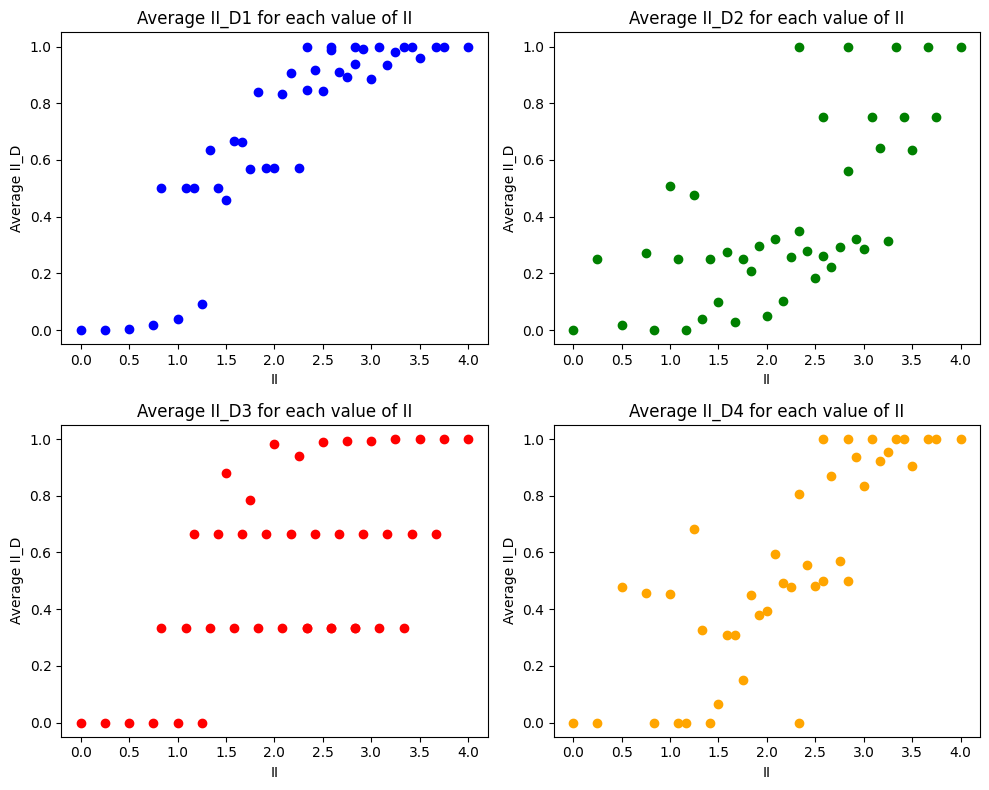

In [190]:
# Calculate the average of each II_D variable grouped by II
average_by_II = emicron.groupby('II')[['II_D1', 'II_D2', 'II_D3', 'II_D4']].mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define colors for each II_D variable
colors = ['blue', 'green', 'red', 'orange']

# Plot each II_D variable on a separate subplot with different colors
for i, (ii_d, color) in enumerate(zip(average_by_II.columns, colors)):
    axs[i].scatter(average_by_II.index, average_by_II[ii_d], color=color)
    axs[i].set_title(f'Average {ii_d} for each value of II')
    axs[i].set_xlabel('II')
    axs[i].set_ylabel('Average II_D')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()